# 一、获取数据
## 1、下载数据

In [113]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/master/"
dir_url = os.getcwd()
HOUSING_PATH = os.path.join(dir_url, "datasets/housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

print(HOUSING_URL)
print(HOUSING_PATH)

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

https://github.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
/Users/dayao/Github/Architect-CTO-growth/人工智能技术/《机器学习实战：基于Scikit-Learn、Keras和TensorFlow》笔记及练习/datasets/housing


## 2、加载数据快速查看数据结构

In [147]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [148]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [149]:
# 通过info（）方法可以快速获取数据集的简单描述，特别是总行数、每个属性的类型和非空值的数量
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


数据集中包含20 640个实例，以机器学习的标准来看，这个数字非常小，但却是个完美的开始。注意，total_bedrooms这个属性只有20 433个非空值，这意味着有207个区域缺失这个特征。我们后面需要考虑到这一点。

所有属性的字段都是数字，除了ocean_proximity。它的类型是object，因此它可以是任何类型的Python对象，不过因为我们从CSV文件中加载了该数据，所以它必然是文本属性。通过查看前5行，我们可能会注意到，该列中的值是重复的，这意味着它有可能是一个分类属性。我们可以使用value_counts（）方法查看有多少种分类存在，每种类别下分别有多少个区域：

In [150]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [151]:
# 再来看看其他区域，通过describe（）方法可以显示数值属性的摘要。
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


另一种快速了解数据类型的方法是绘制每个数值属性的直方图。直方图用来显示给定值范围（横轴）的实例数量（纵轴）。我们可以一次绘制一个属性，也可以在整个数据集上调用hist（）方法（如以下代码示例所示），绘制每个属性的直方图。

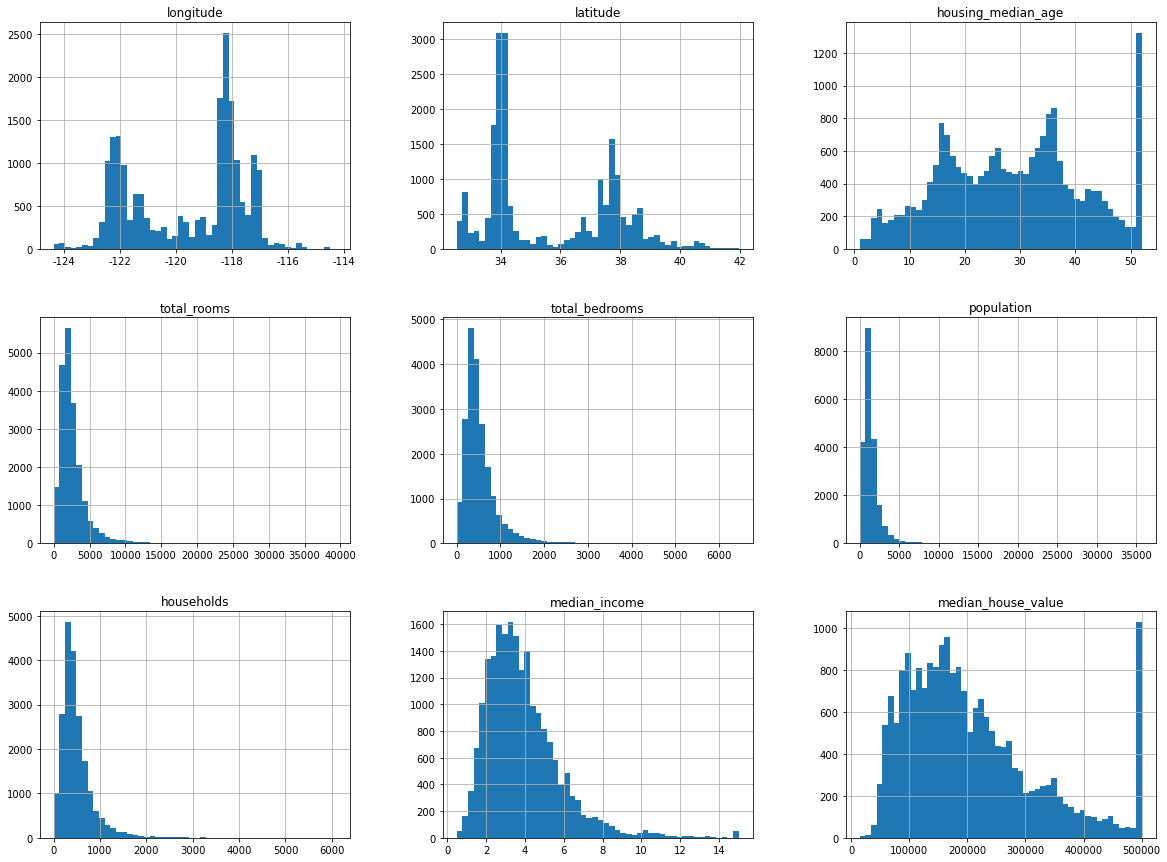

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

> hist（）方法依赖于Matplotlib，而Matplotlib又依赖于用户指定的图形后端才能在屏幕上完成绘制。所以在绘制之前，你需要先指定Matplotlib使用哪个后端。最简单的选择是使用Jupyter的神奇命令%matplotlib inline。它会设置Matplotlib从而使用Jupyter自己的后端，随后图形会在notebook上呈现。需要注意的是，因为Jupyter在执行每个单元格时会自动显示图形，所以在Jupyter notebook中调用show（）是可选的。

回到直方图，请注意以下几点：
1. 首先，收入中位数这个属性看起来不像是用美元（USD）在衡量。经与收集数据的团队核实，你得知数据已经按比例缩小，并框出中位数的上限为15（实际为15.0001），下限为0.5（实际为0.4999）。数字后的单位为万美元，例如，15代表15万美元。在机器学习中，使用经过预处理的属性是很常见的事情，倒不一定是个问题，但是我们至少需要了解数据是如何计算的。
2. 房龄中位数和房价中位数也被设定了上限。而由于后者正是你的目标属性（标签），因此这可能是个大问题。你的机器学习算法很可能会学习到价格永远不会超过这个限制。你需要再次与客户团队（使用你的系统输出的团队）进行核实，查看是否存在问题。如果他们告诉你，他们需要精确的预测值，甚至可以超过50万美元，那么，通常你有两个选择：
    * 对那些标签值被设置了上限的区域，重新收集标签值。
    * 将这些区域的数据从训练集中移除（包括从测试集中移除，因为如果预测值超过50万美元，系统不应被评估为不良）。
3. 这些属性值被缩放的程度各不相同。这将在本章稍后探讨特征缩放时再做讨论。4.最后，许多直方图都表现出重尾：图形在中位数右侧的延伸比左侧要远得多。这可能会导致某些机器学习算法难以检测模式。稍后我们会尝试一些转化方法，将这些属性转化为更偏向钟形的分布。

## 3、创建测试集
理论上，创建测试集非常简单，只需要随机选择一些实例，通常是数据集的20%（如果数据集很大，比例将更小），然后将它们放在一边：

In [153]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [154]:
len(housing)

20640

In [155]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [156]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [157]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19317,-123.04,38.49,30.0,3977.0,930.0,1387.0,582.0,2.6161,132500.0,NEAR OCEAN
15893,-122.39,37.73,52.0,1931.0,329.0,1025.0,293.0,2.9063,192000.0,NEAR BAY
19651,-120.87,37.50,7.0,4966.0,985.0,2431.0,904.0,3.1042,122500.0,INLAND
15776,-122.45,37.77,52.0,3939.0,852.0,1737.0,797.0,4.5052,500001.0,NEAR BAY
18230,-122.09,37.40,17.0,748.0,184.0,412.0,180.0,3.4375,290600.0,NEAR BAY


len(test_set)

但这并不完美。如果再运行一遍，它又会产生一个不同的数据集！这样下去，你（或者你的机器学习算法）将会看到整个完整的数据集，而这正是创建测试集时需要避免的。

解决方案之一是在第一次运行程序后即保存测试集，随后的运行只是加载它而已。另一种方法是在调用np.random.permutation（）之前设置一个随机数生成器的种子（例如，np.random.seed（42）），从而让它始终生成相同的随机索引。

但是，这两种解决方案在下一次获取更新的数据时都会中断。为了即使在更新数据集之后也有一个稳定的训练测试分割，常见的解决方案是每个实例都使用一个标识符来决定是否进入测试集（假定每个实例都有一个唯一且不变的标识符）。例如，你可以计算每个实例标识符的哈希值，如果这个哈希值小于或等于最大哈希值的20%，则将该实例放入测试集。这样可以确保测试集在多个运行里都是一致的，即便更新数据集也仍然一致。新实例的20%将被放入新的测试集，而之前训练集中的实例也不会被放入新测试集。

In [158]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # 加一个index列
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [159]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


如果使用行索引作为唯一标识符，你需要确保在数据集的末尾添加新数据，并且不会删除任何行。如果不能保证这一点，那么你可以尝试使用某个最稳定的特征来创建唯一标识符。例如，一个区域的经纬度肯定几百万年都不会变，你可以将它们组合成如下的ID

In [160]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


Scikit-Learn提供了一些函数，可以通过多种方式将数据集分成多个子集。最简单的函数是train_test_split（），它与前面定义的函数split_train_test（）几乎相同，除了几个额外特征。首先，它也有random_state参数，让你可以像之前提到过的那样设置随机生成器种子；其次，你可以把行数相同的多个数据集一次性发送给它，它会根据相同的索引将其拆分（例如，当你有一个单独的DataFrame用于标记时，这就非常有用）：

In [161]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [162]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


到目前为止，我们思考过了纯随机的抽样方法。如果数据集足够庞大（特别是相较于属性的数量而言），这种方式通常不错；如果不是，则有可能会导致明显的抽样偏差。如果一家调查公司想要打电话给1000个人来调研几个问题，他们不会在电话簿中纯随机挑选1000个人。他们试图确保让这1000人能够代表全体人口。例如，美国人口组成为51.3%的女性和48.7%的男性，所以，要想在美国进行一场有效的调查，样本中应该试图维持这一比例，即513名女性和487名男性。这就是分层抽样：将人口划分为均匀的子集，每个子集称为一层，然后从每层抽取正确的实例数量，以确保测试集合代表了总的人口比例。如果使用纯随机的抽样方法，将有12%的可能得到抽样偏斜的测试集——要么女性比例不到49%，要么女性比例超过54%。不论出现哪种情况都会导致调查结果出现显著偏差。

如果你咨询专家，他们会告诉你，要预测房价中位数，收入中位数是一个非常重要的属性。于是你希望确保在收入属性上，测试集能够代表整个数据集中各种不同类型的收入。由于收入中位数是一个连续的数值属性，所以你得先创建一个收入类别的属性。我们先来看一下收入中位数的直方图（见下图）：大多数收入中位数值聚集在1.5～6（15 000～60 000美元）左右，但也有一部分远远超过了6万美元。在数据集中，每一层都要有足够数量的实例，这一点至关重要，不然数据不足的层，其重要程度很有可能会被错估。也就是说，你不应该将层数分得太多，每一层应该要足够大才行。下面这段代码是用pd.cut（）来创建5个收入类别属性的（用1～5来做标签），0～1.5是类别1，1.5～3是类别2，以此类推：

<AxesSubplot:>

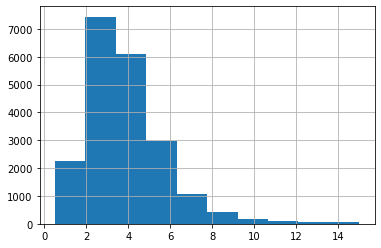

In [163]:
housing["median_income"].hist()

<AxesSubplot:>

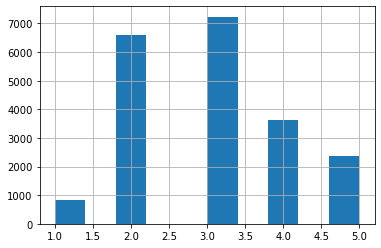

In [164]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [165]:
# 现在，可以根据收入类别进行分层抽样了。使用Scikit-Learn的StratifiedShuffleSplit类
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [166]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


In [167]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [168]:
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [169]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)  
# 随机种子设置为42，这个数字没有特殊的意义

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)
}
).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [170]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 二、从数据探索和可视化中获得洞见
首先，把测试集放在一边，我们能探索的只有训练集。此外，如果训练集非常庞大，我们可以抽样一个探索集，这样后面的操作更简单快捷一些。不过我们这个案例的数据集非常小，完全可以直接在整个训练集上操作。我们先创建一个副本，这样可以随便尝试而不损害训练集：

In [171]:
housing = strat_train_set.copy()

In [172]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND


## 1、将地理数据可视化
由于存在地理位置信息（经度和纬度），因此建立一个各区域的分布图以便于可视化数据是一个很好的做法

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

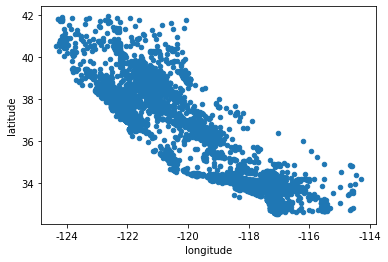

In [173]:
housing.plot(kind="scatter", x="longitude", y="latitude")

上图除了看起来跟加州一样以外，很难再看出任何其他的模式。将alpha选项设置为0.1，可以更清楚地看出高密度数据点的位置

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

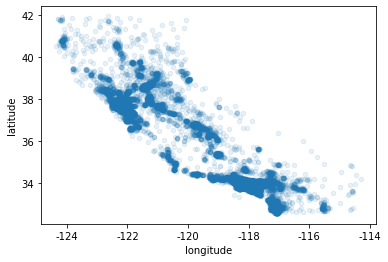

In [174]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

现在可以清楚地看到高密度区域，也就是湾区、洛杉矶和圣地亚哥附近，同时在中央山谷有一条相当高密度的长线，特别是萨克拉门托和弗雷斯诺附近。

再来看看房价（见下图）。每个圆的半径大小代表了每个区域的人口数量（选项s），颜色代表价格（选项c）。我们使用一个名叫jet的预定义颜色表（选项cmap）来进行可视化，颜色范围从蓝（低）到红（高）

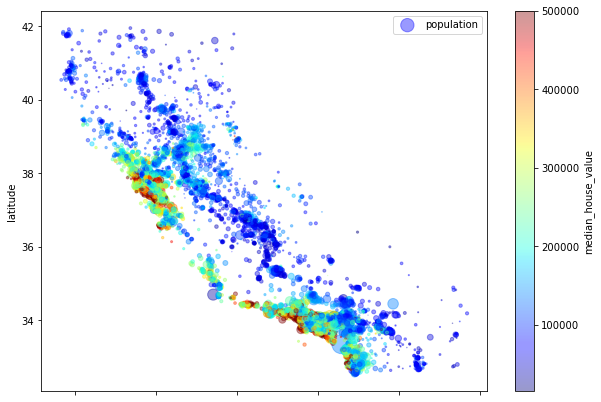

In [175]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

上图体现出的是：加州房价：红色昂贵，蓝色便宜，较大的圆圈表示人口较多的地区

图中可以看到房价与地理位置（例如靠近海）和人口密度息息相关。一个通常很有用的方法是使用聚类算法来检测主集群，然后再为各个集群中心添加一个新的衡量邻近距离的特征。海洋邻近度可能就是一个很有用的属性，不过在北加州，沿海地区的房价并不是太高，所以这个简单的规则也不是万能的。

## 2、寻找相关性
由于数据集不大，我们可以使用corr（）方法轻松计算出每对属性之间的标准相关系数（也称为皮尔逊r）

In [176]:
corr_matrix = housing.corr()

看看每个属性与房价中位数的相关性分别是多少

In [177]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

相关系数的范围从-1变化到1。越接近1，表示有越强的正相关。例如，当收入中位数上升时，房价中位数也趋于上升。当系数接近于-1时，表示有较强的负相关。我们可以看到纬度和房价中位数之间呈现出轻微的负相关（也就是说，越往北走，房价倾向于下降）。最后，系数靠近0则说明二者之间没有线性相关性。

下图显示了横轴和纵轴之间相关性系数的多种图像。
![各种数据集的标准相关系数](images/各种数据集的标准相关系数.png)
>相关系数仅测量线性相关性（“如果x上升，则y上升/下降”）。所以它有可能彻底遗漏非线性相关性（例如“如果x接近于0，则y会上升”）。注意图中最下面一排的图像，它们的相关性系数都是0，但是显然我们可以看出横轴和纵轴之间的关系并不是彼此完全独立的：这是非线性关系的示例。此外，图中第二行显示了相关性为1或-1时的示例，需要注意的是这个相关性跟斜率完全无关。例如，你本人用英寸来计量的身高与你用英尺甚至是纳米来计量的身高之间的相关系数等于1

还有一种方法可以检测属性之间的相关性，就是使用pandas的scatter_matrix函数，它会绘制出每个数值属性相对于其他数值属性的相关性。现在我们有11个数值属性，可以得到$11^2=121$个图像，篇幅原因无法完全展示，这里我们仅关注那些与房价中位数属性最相关的，可算作是最有潜力的属性.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

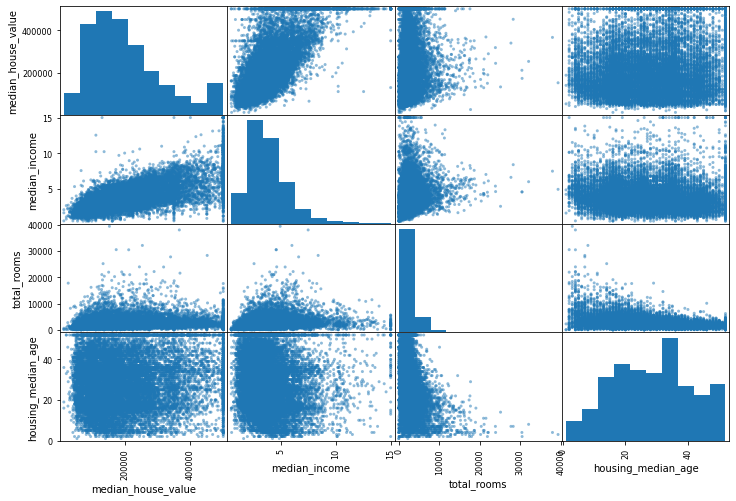

In [178]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

上图这个散布矩阵显示每个数值属性相对于其他数值属性，并绘制每个数值属性的直方图

>如果pandas绘制每个变量对自身的图像，那么主对角线（从左上到右下）将全都是直线，这样毫无意义。所以取而代之的方法是，pandas在这几个图中显示了每个属性的直方图（还有其他选项可选，详情请参考pandas文档）。

最有潜力能够预测房价中位数的属性是收入中位数，所以我们放大来看看其相关性的散点图

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

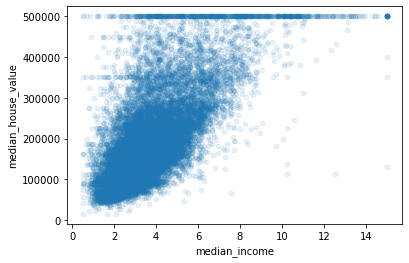

In [179]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

上图说明了几个问题。首先，二者的相关性确实很强，我们可以清楚地看到上升的趋势，并且点也不是太分散。其次，前面我们提到过50万美元的价格上限在图中是一条清晰的水平线，不过除此之外，图中国还显示出几条不那么明显的直线：45万美元附近有一条水平线，35万美元附近也有一条，28万美元附近似乎隐约也有一条，再往下可能还有一些。为了避免我们的算法学习之后重现这些怪异数据，我们可能会尝试删除这些相应区域。

## 3、试验不同属性的组合
通过前面几节的介绍，我们了解到了一些探索数据并从中获得洞见的方法。在准备开始给机器学习算法输入数据之前，我们可能识别出了一些异常数据，需要提前清理掉。同时，说不定我们还发现了不同属性之间的某些有趣联系，特别是跟目标属性相关的联系。再有，我们还可能注意到某些属性的分布显示出了明显的“重尾”分布，于是我们还需要对它们进行转换处理（例如，计算其对数）。

当然，每个项目的历程都不一样，但是大致思路都相似。在准备给机器学习算法输入数据之前，要做的最后一件事应该是尝试各种属性的组合。例如，如果不知道一个区域有多少个家庭，那么知道一个区域的“房间总数”也没什么用。我们真正想要知道的是一个家庭的房间数量。同样，单看“卧室总数”这个属性本身也没什么意义，我们可能想拿它和“房间总数”来对比，或者拿来同“每个家庭的人口数”这个属性组合似乎也挺有意思。我们来试着创建这些新属性：

In [180]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

# 相关矩阵
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

可见，新属性bedrooms_per_room较之“房间总数”或“卧室总数”与房价中位数的相关性都要高得多。显然，卧室/房间比例更低的房屋往往价格更贵。同样，“每个家庭的房间数量”也比“房间总数”更具信息量——房屋越大，价格越贵。

这一轮的探索不一定要多么彻底，关键是迈开第一步，快速获得洞见，这将有助于我们获得非常棒的第一个原型。这也是一个不断迭代的过程：一旦我们的原型产生并且开始运行，我们可以分析它的输出以获得更多洞见，然后再次回到这个探索步骤。

# 三、机器学习算法的数据准备

现在，是时候给我们的机器学习算法准备数据了。这里你应该编写函数来执行，而不是手动操作，原因如下：
* 我们可以在任何数据集上轻松重现这些转换（例如，获得更新的数据集之后）。
* 我们可以逐渐建立起一个转换函数的函数库，可以在以后的项目中重用。
* 我们可以在实时系统中使用这些函数来转换新数据，再输入给算法。
* 我们可以轻松尝试多种转换方式，查看哪种转换的组合效果最佳。

但是现在，我们先回到一个干净的训练集（再次复制strat_train_set），然后将预测器和标签分开，因为这里我们不一定对它们使用相同的转换方式（需要注意drop（）会创建一个数据副本，但是不影响strat_train_set）：

In [181]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [182]:
housing_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

## 1、数据清理
大部分的机器学习算法无法在缺失的特征上工作，所以我们要创建一些函数来辅助它。前面我们已经注意到total_bedrooms属性有部分值缺失，所以我们要解决它。有以下三种选择：
1. 放弃这些相应的区域。
2. 放弃整个属性。
3. 将缺失的值设置为某个值（0、平均数或者中位数等）。

通过DataFrame的dropna（）、drop（）和fillna（）方法，可以轻松完成这些操作：

In [183]:
housing.dropna(subset=["total_bedrooms"]) # 放弃这些相应的区域

housing.drop("total_bedrooms", axis=1) # 放弃整个属性

median = housing["total_bedrooms"].median() # 将缺失的值设置为某个值(中位数)
housing["total_bedrooms"].fillna(median, inplace=True)

如果选择方法3，我们需要计算出训练集的中位数值，然后用它填充训练集中的缺失值，但也别忘了保存这个计算出来的中位数值，因为后面可能需要用到。当重新评估系统时，你需要更换测试集中的缺失值；或者在系统上线时，需要使用新数据替代缺失值。

**Scikit-Learn**提供了一个非常容易上手的类来处理缺失值：SimpleImputer。使用方法如下：首先，我们需要创建一个SimpleImputer实例，指定我们要用属性的中位数值替换该属性的缺失值：

In [184]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

由于中位数值只能在数值属性上计算，所以我们需要创建一个没有文本属性ocean_proximity的数据副本：

In [185]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


使用fit（）方法将imputer实例适配到训练数据：

In [186]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

这里imputer仅仅只是计算了每个属性的中位数值，并将结果存储在其实例变量statistics_中。虽然只有total_bedrooms这个属性存在缺失值，但是我们无法确认系统启动之后新数据中是否一定不存在任何缺失值，所以稳妥起见，还是将imputer应用于所有的数值属性：

In [187]:
imputer.strategy

'median'

In [188]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [189]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

现在，我们可以使用这个“训练有素”的imputer将缺失值替换成中位数值从而完成训练集转换：

In [190]:
X = imputer.transform(housing_num)

结果是一个包含转换后特征的NumPy数组。如果我们想将它放回pandas DataFrame，也很简单：

In [191]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [192]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Scikit-Learn的设计
#### 一致性
所有对象共享一个简单一致的界面。

#### 估算器
能够根据数据集对某些参数进行估算的任意对象都可以称为估算器（例如，imputer就是一个估算器）。估算由fit（）方法执行，它只需要一个数据集作为参数（或者两个——对于有监督学习算法，第二个数据集包含标签）。引导估算过程的任何其他参数都视为超参数（例如，imputer’s strategy），它必须被设置为一个实例变量（一般通过构造函数参数）。

#### 转换器
有些估算器（例如imputer）也可以转换数据集，这些称为转换器。同样，API也非常简单：由transform（）方法和作为参数的待转换数据集一起执行转换，返回的结果就是转换后的数据集。这种转换的过程通常依赖于学习的参数，比如本例中的imputer。所有的转换器都可以使用一个很方便的方法，即fit_transform（），相当于先调用fit（）然后再调用transform（）（但是fit_transform（）有时是被优化过的，所以运行得更快一些）。

#### 预测器
最后，还有些估算器能够基于一个给定的数据集进行预测，这称为预测器。例如，LinearRegression模型就是一个预测器，它基于一个国家的人均GDP预测该国家的生活满意度。预测器的predict（）方法会接受一个新实例的数据集，然后返回一个包含相应预测的数据集。值得一提的还有一个score（）方法，可以用来衡量给定测试集的预测质量（以及在有监督学习算法里对应的标签）.
> 一些预测器还提供了测量其预测的置信度的方法。

#### 检查
所有估算器的超参数都可以通过公共实例变量（例如，imputer.strategy）直接访问，并且所有估算器的学习参数也可以通过有下划线后缀的公共实例变量来访问（例如，imputer.statistics）。

#### 防止类扩散
数据集被表示为NumPy数组或SciPy稀疏矩阵，而不是自定义的类型。超参数只是普通的Python字符串或者数字。

#### 构成
现有的构件块尽最大可能重用。例如，任意序列的转换器最后加一个预测器就可以轻松创建一个Pipeline估算器。

#### 合理的默认值
Scikit-Learn为大多数参数提供了合理的默认值，从而可以快速搭建起一个基本的工作系统。

## 2、处理文本和分类属性
到目前为止，我们只处理数值属性，但现在让我们看一下文本属性。在此数据集中，只有一个：ocean_proximity属性是文本。我们看看前10个实例的值：

In [193]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


它不是任意文本，而是有限个可能的取值，每个值代表一个类别。因此，此属性是分类属性。大多数机器学习算法更喜欢使用数字，因此让我们将这些类别从文本转到数字。为此，我们可以使用Scikit-Learn的OrdinalEncoder类

In [194]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

我们可以使用Categories_实例变量获取类别列表。这个列表包含每个类别属性的一维数组（在这种情况下，这个列表包含一个数组，因为只有一个类别属性）：

In [195]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

这种表征方式产生的一个问题是，机器学习算法会认为两个相近的值比两个离得较远的值更为相似一些。在某些情况下这是对的（对一些有序类别，像“坏”“平均”“好”“优秀”），但是，对ocean_proximity而言情况并非如此（例如，类别0和类别4之间就比类别0和类别1之间的相似度更高）。为了解决这个问题，常见的解决方案是给每个类别创建一个二进制的属性：当类别是“<1H OCEAN”时，一个属性为1（其他为0），当类别是“INLAND”时，另一个属性为1（其他为0），以此类推。这就是独热编码，因为只有一个属性为1（热），其他均为0（冷）。新的属性有时候称为哑（dummy）属性。Scikit-Learn提供了一个OneHotEncoder编码器，可以将整数类别值转换为独热向量。我们用它来将类别编码为独热向量。

In [196]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

注意到这里的输出是一个SciPy稀疏矩阵，而不是一个NumPy数组。当你有成千上万个类别属性时，这个函数会非常有用。因为在独热编码完成之后，我们会得到一个几千列的矩阵，并且全是0，每行仅有一个1。占用大量内存来存储0是一件非常浪费的事情，因此稀疏矩阵选择仅存储非零元素的位置。而你依旧可以像使用一个普通的二维数组那样来使用它，当然如果你实在想把它转换成一个（密集的）NumPy数组，只需要调用toarray（）方法即可：

In [197]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

> 如果类别属性具有大量可能的类别（例如，国家代码、专业、物种），那么独热编码会导致大量的输入特征，这可能会减慢训练并降低性能。如果发生这种情况，你可能想要用相关的数字特征代替类别输入。例如，你可以用与海洋的距离来替换ocean_proximity特征（类似地，可以用该国家的人口和人均GDP来代替国家代码）。或者，你可以用可学习的低维向量（称为嵌入）来替换每个类别。每个类别的表征可以在训练期间学习。这是表征学习的示例

## 3、自定义转换器
虽然Scikit-Learn提供了许多有用的转换器，但是你仍然需要为一些诸如自定义清理操作或组合特定属性等任务编写自己的转换器。你当然希望让自己的转换器与Scikit-Learn自身的功能（比如流水线）无缝衔接，而由于Scikit-Learn依赖于鸭子类型的编译，而不是继承，所以你所需要的只是创建一个类，然后应用以下三种方法：fit（）（返回self）、transform（）、fit_transform（）。

你可以通过添加TransformerMixin作为基类，直接得到最后一种方法。同时，如果添加BaseEstimator作为基类（并在构造函数中避免*args和** kargs），你还能额外获得两种非常有用的自动调整超参数的方法（get_params（）和set_params（））。例如，我们前面讨论过的组合属性，这里有个简单的转换器类，用来添加组合后的属性：

In [198]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [199]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [200]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## 4、特征缩放
最重要也最需要应用到数据上的转换就是特征缩放。如果输入的数值属性具有非常大的比例差异，往往会导致机器学习算法的性能表现不佳，当然也有极少数特例。案例中的房屋数据就是这样：房间总数的范围从6～39 320，而收入中位数的范围是0～15。注意，目标值通常不需要缩放。

同比例缩放所有属性的两种常用方法是**最小-最大缩放和标准化**。

最小-最大缩放（又叫作归一化）很简单：将值重新缩放使其最终范围归于0～1之间。实现方法是将值减去最小值并除以最大值和最小值的差。对此，Scikit-Learn提供了一个名为MinMaxScaler的转换器。如果出于某种原因，你希望范围不是0～1，那么可以通过调整超参数feature_range进行更改。

标准化则完全不一样：首先减去平均值（所以标准化值的均值总是零），然后除以方差，从而使得结果的分布具备单位方差。不同于最小-最大缩放的是，标准化不将值绑定到特定范围，对某些算法而言，这可能是个问题（例如，神经网络期望的输入值范围通常是0～1）。但是标准化的方法受异常值的影响更小。例如，假设某个地区的平均收入为100（错误数据），最小-最大缩放会将所有其他值从0～15降到0～0.15，而标准化则不会受到很大影响。Scikit-Learn提供了一个标准化的转换器StandadScaler。

> 重要的是，跟所有转换一样，缩放器仅用来拟合训练集，而不是完整的数据集（包括测试集）。只有这样，才能使用它们来转换训练集和测试集（和新数据）。

## 5、转换流水线
正如你所见，许多数据转换的步骤需要以正确的顺序来执行。而Scikit-Learn正好提供了Pipeline类来支持这样的转换。下面是一个数值属性的流水线示例：

In [201]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [202]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [203]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [204]:
housing_num_tr.shape

(16512, 11)

Pipeline构造函数会通过一系列名称/估算器的配对来定义步骤序列。除了最后一个是估算器之外，前面都必须是转换器（也就是说，必须有fit_transform（）方法）。至于命名可以随意，你喜欢就好（只要它们是独一无二的，不含双下划线），它们稍后在超参数调整中会有用。

当调用流水线的fit（）方法时，会在所有转换器上按照顺序依次调用fit_transform（），将一个调用的输出作为参数传递给下一个调用方法，直到传递到最终的估算器，则只会调用fit（）方法。

流水线的方法与最终的估算器的方法相同。在本例中，最后一个估算器是StandardScaler，这是一个转换器，因此流水线有一个transform（）方法，可以按顺序将所有的转换应用到数据中（这也是我们用过的fit_transform（）方法）。

**到目前为止，我们分别处理了类别列和数值列。拥有一个能够处理所有列的转换器会更方便**，将适当的转换应用于每个列。在0.20版中，Scikit-Learn为此引入了ColumnTransformer，好消息是它与pandas DataFrames一起使用时效果很好。让我们用它来将所有转换应用到房屋数据：

In [205]:
len(housing)

16512

In [206]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND


In [207]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [208]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [209]:
housing_prepared.shape

(16512, 16)

# 四、选择和训练模型
至此，你提出了问题，获得了数据，也进行了数据探索，然后对训练集和测试集进行了抽样并编写了转换流水线，从而可以自动清理和准备机器学习算法的数据！现在是时候选择机器学习模型并展开训练了。

## 1、训练和评估训练集

In [210]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

现在你有一个可以工作的线性回归模型了。让我们用几个训练集的实例试试：

In [212]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [213]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


可以工作了，虽然预测还不是很准确（例如，第一次的预测失效接近40%！）。我们可以使用Scikit-Learn的mean_squared_error（）函数来测量整个训练集上回归模型的RMSE：

In [214]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

显然这不是一个好看的成绩：大多数区域的median_housing_values分布在120 000～265 000美元之间，所以典型的预测误差达到68 628美元只能算是差强人意。这就是一个典型的模型对训练数据欠拟合的案例。这种情况发生时，通常意味着这些特征可能无法提供足够的信息来做出更好的预测，或者是模型本身不够强大。我们在第1章已经提到，想要修正欠拟合，可以通过选择更强大的模型，或为算法训练提供更好的特征，又或者减少对模型的限制等方法。我们这个模型不是一个正则化的模型，所以就排除了最后那个选项。你可以试试添加更多的特征（例如，人口数量的日志），但首先，让我们尝试一个更复杂的模型，看看它到底是怎么工作的。

我们来训练一个DecisionTreeRegressor。这是一个非常强大的模型，它能够从数据中找到复杂的非线性关系。

In [217]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [219]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

完全没有错误？这个模型真的可以做到绝对完美吗？当然，更有可能的是这个模型对数据严重过拟合了。我们怎么确认呢？前面提到过，在你有信心启动模型之前，都不要触碰测试集，所以这里，你需要拿训练集中的一部分用于训练，另一部分用于模型验证。

## 2、使用交叉验证来更好地进行评估
评估决策树模型的一种方法是使用train_test_split函数将训练集分为较小的训练集和验证集，然后根据这些较小的训练集来训练模型，并对其进行评估。这虽然有一些工作量，但是不会太难，并且非常有效。

另一个不错的选择是使用Scikit-Learn的K-折交叉验证功能。以下是执行K-折交叉验证的代码：它将训练集随机分割成10个不同的子集，每个子集称为一个折叠，然后对决策树模型进行10次训练和评估——每次挑选1个折叠进行评估，使用另外的9个折叠进行训练。产生的结果是一个包含10次评估分数的数组：

In [221]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

> Scikit-Learn的交叉验证功能更倾向于使用效用函数（越大越好）而不是成本函数（越小越好），所以计算分数的函数实际上是负的MSE（一个负值）函数，这就是为什么上面的代码在计算平方根之前会先计算出-scores。让我们看看结果：

In [220]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [222]:
display_scores(tree_rmse_scores)

Scores: [72409.28536077 71632.72136742 68590.84957979 73171.53155738
 70215.27061068 78120.73665184 70341.75939656 72866.98472996
 68275.02570921 70797.58611814]
Mean: 71642.17510817402
Standard deviation: 2673.726753641482


这次的决策树模型好像不如之前表现得好。事实上，它看起来简直比线性回归模型还要糟糕！请注意，交叉验证不仅可以得到一个模型性能的评估值，还可以衡量该评估的精确度（即其标准差）。这里该决策树得出的评分约为71 407，上下浮动±2439。如果你只使用了一个验证集，就收不到这样的结果信息。交叉验证的代价就是要多次训练模型，因此也不是永远都行得通。

保险起见，让我们也计算一下线性回归模型的评分：

In [223]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


没错，决策树模型确实是严重过拟合了，以至于表现得比线性回归模型还要糟糕。

我们再来试试最后一个模型：RandomForestRegressor。在第7章中，我们将会了解到随机森林的工作原理：通过对特征的随机子集进行许多个决策树的训练，然后对其预测取平均。在多个模型的基础之上建立模型，称为集成学习，这是进一步推动机器学习算法的好方法。

In [224]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [225]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51426.34308843 49021.20889648 46770.45883962 52261.97665597
 47204.42673521 51943.84988588 52599.68800593 49765.96321701
 48442.36076035 53404.5571402 ]
Mean: 50284.08332250833
Standard deviation: 2239.555989723308


这个就好多了：随机森林看起来很有戏。但是，请注意，训练集上的分数仍然远低于验证集，这意味着该模型仍然对训练集过拟合。过拟合的可能解决方案包括简化模型、约束模型（即使其正规化），或获得更多的训练数据。不过在深入探索随机森林之前，你应该先尝试一遍各种机器学习算法的其他模型（几种具有不同内核的支持向量机，比如神经网络模型等），但是记住，别花太多时间去调整超参数。我们的目的是筛选出几个（2～5个）有效的模型。

# 五、微调模型
假设你现在有了一个有效模型的候选列表。现在你需要对它们进行微调。我们来看几个可行的方法。

## 1、网格搜索
一种微调的方法是手动调整超参数，直到找到一组很好的超参数值组合。这个过程非常枯燥乏味，你可能坚持不到足够的时间来探索出各种组合。

相反，你可以用Scikit-Learn的GridSearchCV来替你进行探索。你所要做的只是告诉它你要进行实验的超参数是什么，以及需要尝试的值，它将会使用交叉验证来评估超参数值的所有可能组合。例如，下面这段代码搜索RandomForestRegressor的超参数值的最佳组合：

In [226]:
from sklearn.model_selection import GridSearchCV

param_grid = [
   # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

这个param_grid告诉Scikit-Learn，首先评估第一个dict中的n_estimator和max_features的所有3×4=12种超参数值组合（先不要担心这些超参数现在意味着什么，我们将在第7章中进行解释）；接着，尝试第二个dict中超参数值的所有2×3=6种组合，但这次超参数bootstrap需要设置为False而不是True（True是该超参数的默认值）。

总而言之，网格搜索将探索RandomForestRegressor超参数值的12+6=18种组合，并对每个模型进行5次训练（因为我们使用的是5-折交叉验证）。换句话说，总共会完成18×5=90次训练！这可能需要相当长的时间，但是完成后你就可以获得最佳的参数组合：

In [227]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

> 因为被评估的n_estimator最大值是8和30，所以你还可以试试更高的值，评分可能还会继续改善。

你可以直接得到最好的估算器：

In [228]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

>如果GridSearchCV被初始化为refit=True（默认值），那么一旦通过交叉验证找到了最佳估算器，它将在整个训练集上重新训练。这通常是个好方法，因为提供更多的数据很可能提升其性能。

当然还有评估分数：

In [229]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

在本例中，我们得到的最佳解决方案是将超参数max_features设置为8，将超参数n_estimators设置为30。这个组合的RMSE分数为49 682，略优于之前使用默认超参数值的分数50 182。恭喜你，你成功地将模型调整到了最佳模式！

In [230]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.056593,0.005710,0.003409,0.000263,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.175345,0.013475,0.009051,0.000736,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.500068,0.009123,0.024882,0.001081,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.089837,0.002717,0.003431,0.000241,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.299798,0.034871,0.009548,0.000820,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.817275,0.006959,0.024843,0.000586,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.112247,0.001637,0.003040,0.000108,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.376789,0.003261,0.008656,0.000170,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.542414,0.511113,0.034160,0.004778,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.151135,0.004328,0.003112,0.000079,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## 2、分析最佳模型及其误差
通过检查最佳模型，你总是可以得到一些好的洞见。例如在进行准确预测时，RandomForestRegressor可以指出每个属性的相对重要程度：

In [231]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

将这些重要性分数显示在对应的属性名称旁边：

In [232]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

有了这些信息，你可以尝试删除一些不太有用的特征（例如，本例中只有一个ocean_proximity是有用的，我们可以试着删除其他所有特征）。

然后，你还应该查看一下系统产生的具体错误，尝试了解它们是怎么产生的，以及该怎么解决（通过添加额外的特征、删除没有信息的特征、清除异常值等）。

## 3、通过测试集评估系统
通过一段时间的训练，你终于有了一个表现足够优秀的系统。现在是用测试集评估最终模型的时候了。这个过程没有什么特别的，只需要从测试集中获取预测器和标签，运行full_pipeline来转换数据（**调用transform（）而不是fit_transform（）**），然后在测试集上评估最终模型：

In [233]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predoctions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predoctions)
final_rmse = np.sqrt(final_mse)

In [234]:
final_rmse

47873.26095812988

在某些情况下，泛化误差的这种点估计将不足以说服你启动生产环境：如果它仅比当前生产环境中的模型好0.1%？你可能想知道这个估计的精确度。为此，你可以使用scipy.stats.t.interval（）计算泛化误差的95%置信区间：

In [235]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predoctions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

如果之前进行过大量的超参数调整，这时的评估结果通常会略逊于你之前使用交叉验证时的表现结果（因为通过不断调整，系统在验证数据上终于表现良好，在未知数据集上可能达不到这么好的效果）。在本例中，结果虽然并非如此，但是当这种情况发生时，你一定不要继续调整超参数，不要试图再努力让测试集的结果变得好看一些，因为这些改进在泛化到新的数据集时又会变成无用功。

现在进入项目预启动阶段：你将要展示你的解决方案（强调学习了什么，什么有用，什么没有用，基于什么假设，以及系统的限制有哪些），记录所有事情，通过清晰的可视化和易于记忆的陈述方式制作漂亮的演示文稿（例如，“收入中位数是预测房价的首要指标”）。在这个加州住房的示例里，系统的最终性能并不比专家估算的效果好，通常会下降20%左右，但这仍然是一个不错的选择，因为这为专家腾出了一些时间以便他们可以投入更有趣和更有生产力的任务上。

# 附：导出模型
每一个尝试过的模型你都应该妥善保存，以便将来可以轻松回到你想要的模型当中。记得还要同时保存超参数和训练过的参数，以及交叉验证的评分和实际预测的结果。这样你就可以轻松地对比不同模型类型的评分，以及不同模型造成的错误类型。通过Python的pickle模块或joblib库，你可以轻松保存Scikit-Learn模型。

### 一个完整的流水线包括 数据准备和模型训练、预测

In [236]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
]
)

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [237]:
my_model = full_pipeline_with_predictor

### 导出模型

In [238]:
import joblib
joblib.dump(my_model, "model/LinearRegression_model.pkl")

['model/LinearRegression_model.pkl']

### 加载模型

In [239]:
LinearRegression_model = joblib.load("model/LinearRegression_model.pkl")

In [247]:
housing_predictions = LinearRegression_model.predict(X_test)
final_mse = mean_squared_error(y_test, housing_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

66913.44191320929